In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def crop_input_image(image,croped_image_shape):
    input_image = image[
         croped_image_shape['height_start']:croped_image_shape['height_end'],
         croped_image_shape['width_start']:croped_image_shape['width_end']]
    
    return input_image

def extract_image_contours(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    binary_image = cv2.threshold(gray_image,
                                 80,255,
                                 cv2.THRESH_BINARY)[1]
    all_image_contours = cv2.findContours(binary_image,
                                          cv2.RETR_TREE,
                                          cv2.CHAIN_APPROX_NONE)[0]
    def sort_by_boundings(c):
            bounding_rect = cv2.boundingRect(c)
            
            return(bounding_rect[1], bounding_rect[0])
    
    all_image_contours = [
        c for c in all_image_contours if cv2.contourArea(c) > 100]
    all_image_contours.sort(key=sort_by_boundings)
    image_contours = all_image_contours[1:]
    
    return image_contours

def plot_bounding_shapes(input_image, image_contours):
    input_image_copy = np.copy(input_image)
    bound_box_input_image = np.copy(input_image)
    rotated_bound_box_input_image = np.copy(input_image)
    elipse_bound_box_input_image = np.copy(input_image)

    contours_on_image = cv2.drawContours(input_image_copy,
                                         image_contours,
                                         contourIdx = -1,
                                         color = (255,0,0),
                                         thickness = 2)
    bounding_color = (0,180,0)
    for cont in image_contours:
        area = cv2.contourArea(cont)
        area = str(area)
        bound_box_x,bound_box_y,bound_box_w,bound_box_h = cv2.boundingRect(cont)
        bound_box = cv2.rectangle(bound_box_input_image,
                                  (bound_box_x,bound_box_y),
                                  (bound_box_x+bound_box_w,
                                   bound_box_y+bound_box_h),
                                   bounding_color,thickness = 3)
        
        cv2.putText(bound_box_input_image, area,
                    (bound_box_x+bound_box_w,bound_box_y),
                    cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1,
                    color = (100, 0, 0), thickness = 2)

        rect = cv2.minAreaRect(cont)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        rotated_bound_box = cv2.drawContours(rotated_bound_box_input_image,
                                             [box],
                                             0,bounding_color,thickness = 3)

        ellipse = cv2.fitEllipse(cont)
        elipse_bound_box = cv2.ellipse(elipse_bound_box_input_image,
                                       ellipse,
                                       bounding_color,thickness = 3)

    fig = plt.figure(figsize=(15,10))
    gs = fig.add_gridspec(1, 5, hspace=0, wspace=0)
    (ax1, ax2, ax3, ax4, ax5) = gs.subplots(sharex='col',
                                            sharey='row')
    fontsize = 12
    ax1.imshow(input_image)
    ax1.set_title('Input image', fontsize = fontsize)
    ax2.imshow(contours_on_image)
    ax2.set_title('Contour image', fontsize = fontsize)
    ax3.imshow(bound_box)
    ax3.set_title('Bounding box', fontsize = fontsize)
    ax4.imshow(rotated_bound_box)
    ax4.set_title('Rotated bounding box', fontsize = fontsize)
    ax5.imshow(elipse_bound_box)
    ax5.set_title('Bounding elipse', fontsize = fontsize)
    for ax in fig.get_axes():
        ax.label_outer()

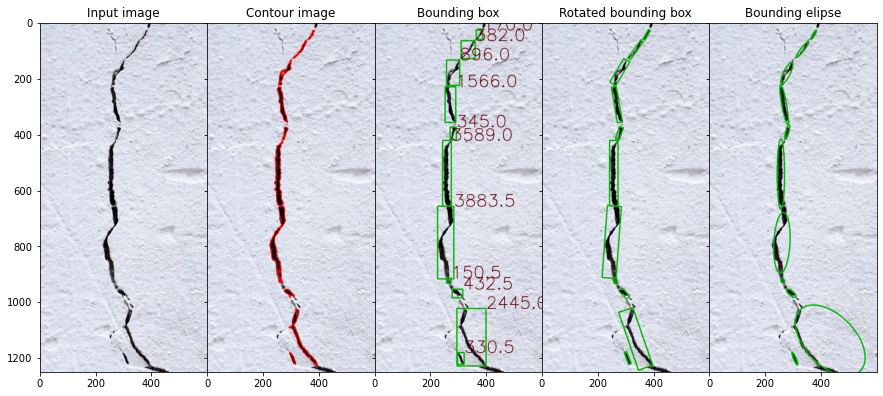

In [39]:
full_input_image = plt.imread(r'.\input_data\foundation_fracture1.jpg')
img_shape = {'height_start':0,'height_end':1250,
              'width_start':500,'width_end':1100}
input_image = crop_input_image(full_input_image,img_shape)
fruction_contours= extract_image_contours(input_image)
plot_bounding_shapes(input_image, fruction_contours)

In [19]:
for cont in fruction_contours:
    area = cv2.contourArea(cont)
    print(area)

170.0
382.0
896.0
1566.0
345.0
3589.0
3883.5
150.5
432.5
2445.0
330.5
